In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
#
tag = '.sp5'
city_num = 5
#
resolution = 12
#
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
#
left = -68
right = -39
bottom = -35
top = -14
#
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#
camadir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity'
rgndir = f"/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region"

In [3]:
#ctymsk_load = f"{glbdir}/dat/cty_msk_/{POP}/city_{city_num:08}{SUF}"
ctymsk_load = f"{camadir}/dat/cty_msk_/city_clrd0000{SUF}"
ctyprf_load = f"{camadir}/dat/cty_prf_/prf_clrd0000{SUF}"
ctyswg_load = f"{camadir}/dat/cty_swg_/swg_clrd0000{SUF}"
ctyint_load = f"{camadir}/dat/cty_aqd_/100km_elevation/city_{city_num:08}{SUF}"
load_list = [ctymsk_load, ctyprf_load, ctyswg_load]

ctymsk_save = f"{rgndir}/dat/cty_msk_/city_{city_num:08}{tag}"
ctyprf_save = f"{rgndir}/dat/cty_prf_/city_{city_num:08}{tag}"
ctyswg_save = f"{rgndir}/dat/cty_swg_/city_{city_num:08}{tag}"
ctyint_save = f"{rgndir}/dat/cty_int_/city_{city_num:08}{tag}"
save_list = [ctymsk_save, ctyprf_save, ctyswg_save]

In [4]:
# save the files
p0mis = 0

save_flag = True
if save_flag is True:
    for loadfile, savefile in zip(load_list, save_list):
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        data = np.where(data==city_num, 1, 0)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region.astype(np.float32).tofile(savefile)
        print(f"{savefile} saved")
        
    data = np.fromfile(ctyint_load, dtype=dtype).reshape(gl5shape)
    region = data[upperindex:lowerindex, leftindex:rightindex]
    region.astype(np.float32).tofile(ctyint_save)
    print(f"{ctyint_save} saved")

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/cty_msk_/city_00000005.sp5 saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/cty_prf_/city_00000005.sp5 saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/cty_swg_/city_00000005.sp5 saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/cty_int_/city_00000005.sp5 saved


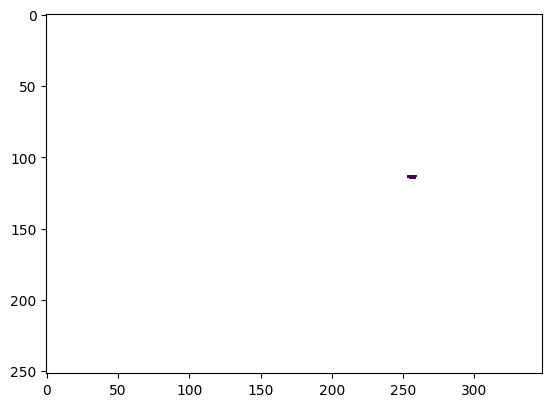

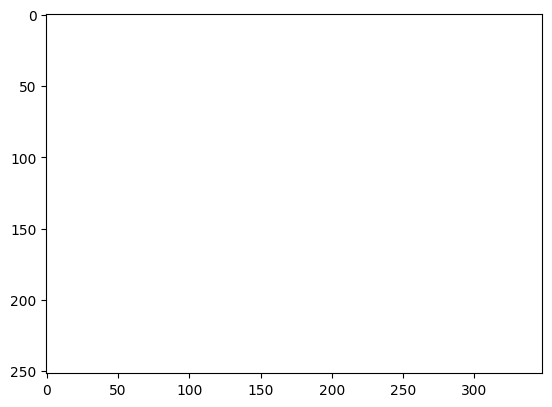

1.0


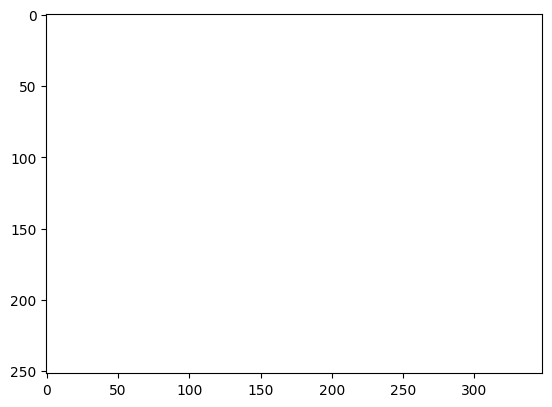

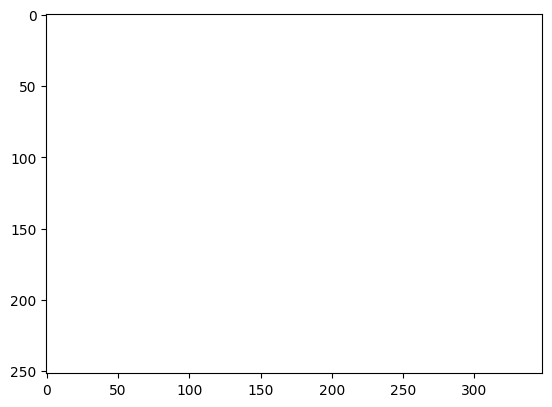

In [6]:
# view the files
tmppath = f"{rgndir}/dat/cty_msk_/city_{city_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f"{rgndir}/dat/cty_prf_/city_{city_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f"{rgndir}/dat/cty_swg_/city_{city_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f"{rgndir}/dat/cty_int_/city_{city_num:08}{tag}"
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()